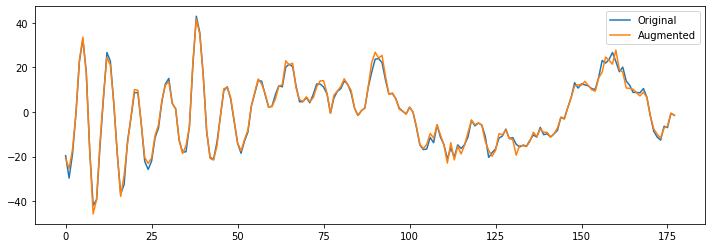

In [1]:
import torch, os
import numpy as np
import matplotlib.pyplot as plt

from DataLoader import TimeSeriesDataset
from torch.utils.data import Dataset
import torch.fft as fft
from Augmentation import augment_Data_FD, augment_Data_TD

# Datasets to check

In [11]:
datasets_list = ['SleepEEG', 'Epilepsy', 'FD-A', 'FD-B', 'HAR', 'Gesture', 'ecg', 'emg']
datasets = []
SleepEEG = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "SleepEEG", "train.pt")), augment = True, jitter=True, scaling = False)
SleepEEGjitterscaled = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "SleepEEG", "train.pt")), augment = True, jitter=True, scaling = True)
SleepEEGscaled = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "SleepEEG", "train.pt")), augment = True, jitter=False, scaling = True)

# SleepEEG

## Jitter

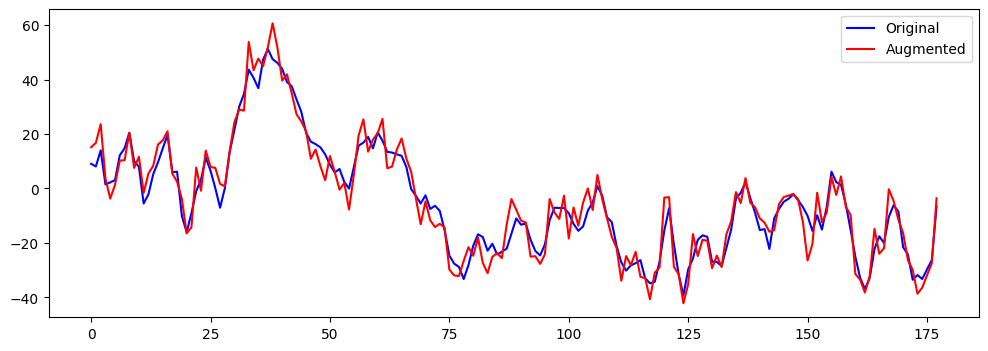

In [24]:
plt.figure(figsize=(12,4))
plt.plot(SleepEEG.X[0][0], label = "Original", color = 'b')
plt.plot(SleepEEG.X_aug[0][0], label = "Augmented", color = 'r')
plt.legend()
plt.show()

## Jitter and scaled

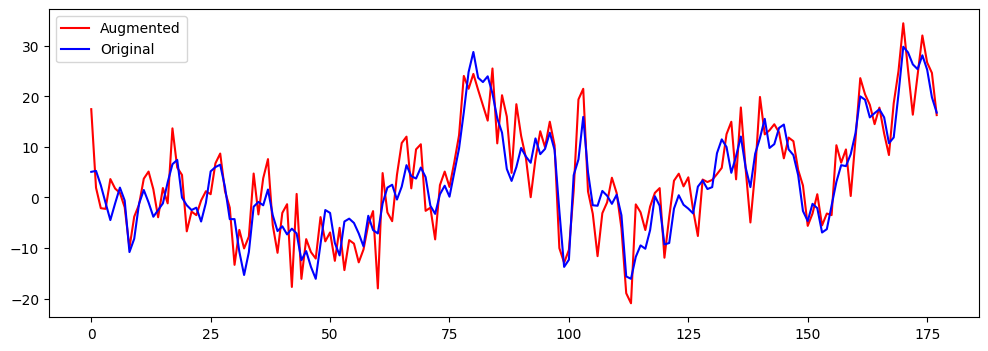

In [25]:
plt.figure(figsize=(12,4))
plt.plot(SleepEEGjitterscaled.X_aug[0][0], label = "Augmented", color = 'r')
plt.plot(SleepEEGjitterscaled.X[0][0], label = "Original", color = 'b')
plt.legend()
plt.show()

## Scaled

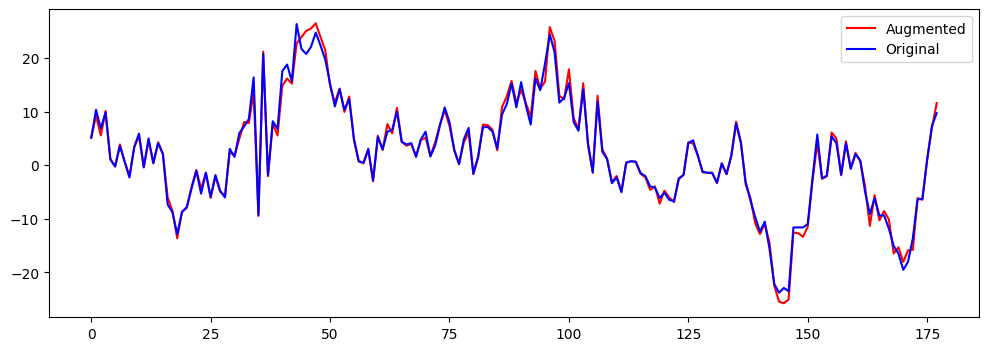

In [26]:
plt.figure(figsize=(12,4))
plt.plot(SleepEEGscaled.X_aug[0][0], label = "Augmented", color = 'r')
plt.plot(SleepEEGscaled.X[0][0], label = "Original", color = 'b')
plt.legend()
plt.show()

# Frequency domain

## Subtraction

In [2]:
datasets_list = ['SleepEEG', 'Epilepsy', 'FD-A', 'FD-B', 'HAR', 'Gesture', 'ecg', 'emg']
datasets = []
SleepEEG = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "SleepEEG", "train.pt")), augment = True, jitter=True, scaling = False)

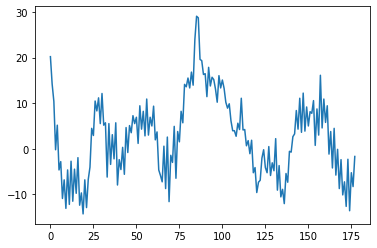

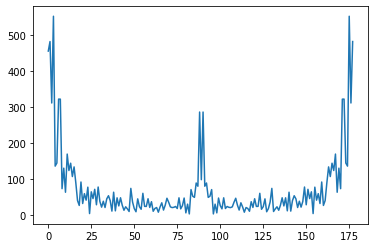

In [14]:
plt.plot(SleepEEG.X[0][0])
plt.show()
plt.plot(SleepEEG.X_f[0][0])
plt.show()

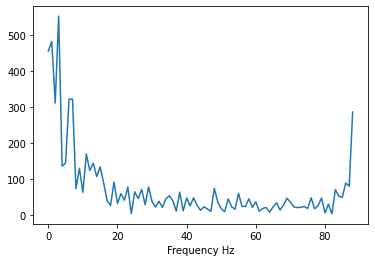

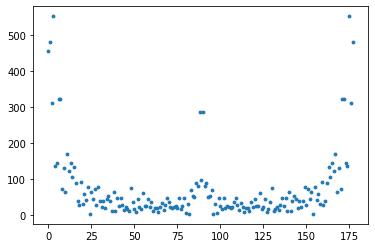

In [24]:
middle = SleepEEG.X_f[0][0].shape[0]//2
signal = SleepEEG.X_f[0][0]
plt.plot(signal[:middle])
plt.xlabel("Frequency Hz")
fig, ax = plt.subplots()
ax.scatter(x=torch.arange(signal.shape[0]), y=signal, s=8)

## Addition

### Load data

In [349]:
Epilepsy = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "Epilepsy", "train.pt")), augment = True, addition=True)

tensor(7120)


### Plot addition augmentation

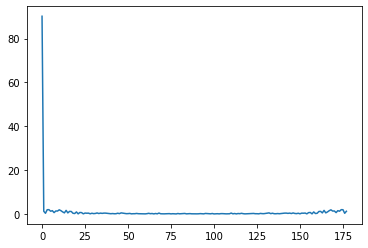

In [324]:
plt.plot(Epilepsy.X_f[0][0])
plt.plot(Epilepsy.X_f_aug[0][0])
plt.show()

In [291]:
indices = Epilepsy.X_f.argmax(2)
max_vals = Epilepsy.X_f[torch.arange(indices.shape[0]).reshape(-1,1), torch.arange(indices.shape[1]), indices]
max_vals

tensor([[ 552.8559],
        [1782.3353],
        [1366.3033],
        ...,
        [1598.9879],
        [2834.5371],
        [1377.9485]])

# All augmentations

In [2]:
datasets_list = ['SleepEEG', 'Epilepsy', 'FD-A', 'FD-B', 'HAR', 'Gesture', 'ecg', 'emg']
dataset_name = 'SleepEEG'
dataset = torch.load(os.path.join("datasets", dataset_name, "train.pt"))
#jitter = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", dataset, "train.pt")), augment = True, jitter=True)
#scale = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", dataset, "train.pt")), augment = True, scaling = True)
#remove = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", dataset, "train.pt")), augment = True, removal = True)
#add = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", dataset, "train.pt")), augment = True, addition = True)



In [12]:
# dataset, augment, jitter, scaling, removal, addition
params={'Original (time)':[dataset,True,False,False,False,False], #maybe we should change augment arg because of this
        'Jitter':[dataset,True,True,False,False,False],
        'Scaling':[dataset,True,False,True,False,False],
        'Original (frequency)':[dataset,True,False,False,False,False],
        'Removal':[dataset,True,False,False,True,False],
        'Addition':[dataset,True,False,False,False,True]}
instances = {name:TimeSeriesDataset(*args) for name, args in params.items()}
instances['Jitter']

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


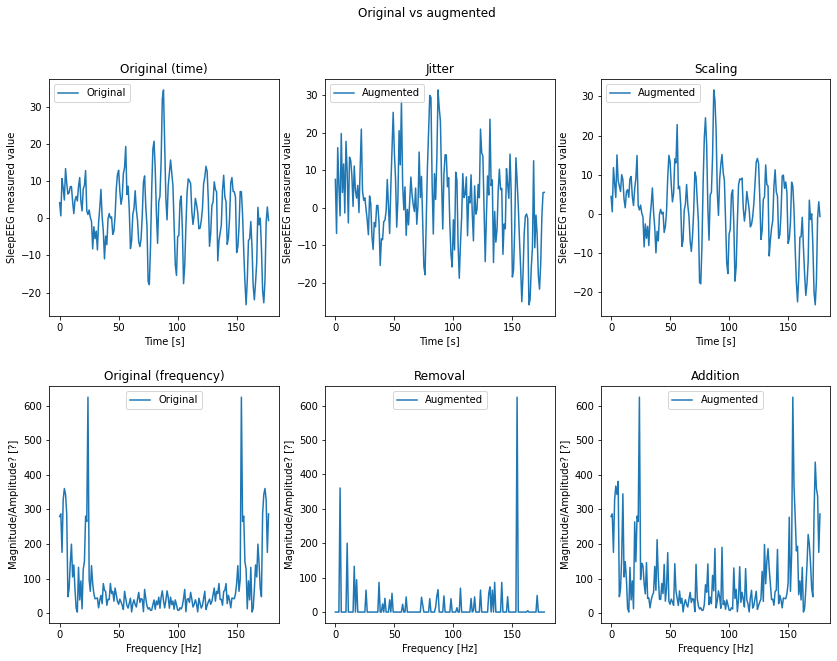

In [20]:
fig, axs = plt.subplots(2,3, figsize = (14,10))
fig.suptitle('Original vs augmented')
plt.subplots_adjust(hspace=0.3)

print(axs.ravel())
plot_idx = 0
for (name,instance),ax in zip(instances.items(),axs.ravel()):
    if instance.X_aug != None:
        ax.plot(instance.X_aug[plot_idx][0], label='Augmented')
        ax.legend(loc='upper left')
        ax.set_title(name)
    elif instance.X_f_aug != None:
        ax.plot(instance.X_f_aug[plot_idx][0], label='Augmented')
        ax.legend(loc='upper center')
        ax.set_title(name)
    elif 'time' in name:
        ax.plot(instance.X[plot_idx][0], label='Original')
        ax.legend(loc='upper left')
        ax.set_title(name)
    elif 'frequency' in name:
        ax.plot(instance.X_f[plot_idx][0], label='Original')
        ax.legend(loc='upper center')
        ax.set_title(name)
    else:
        raise NotImplementedError("ERROR. None of the desired conditions are met.")

middle = 3
for ax in axs.flat[:middle]:
    ax.set(xlabel='Time [s]', ylabel=f'{dataset_name} measured value')
for ax in axs.flat[middle:]:
    ax.set(xlabel='Frequency [Hz]', ylabel='Magnitude/Amplitude? [?]')
    
plt.show()

In [67]:
axs.ravel()

array([<AxesSubplot:title={'center':'Jitter'}, xlabel='Time [s]', ylabel='SleepEEG measured value'>,
       <AxesSubplot:title={'center':'Scaling'}, xlabel='Time [s]', ylabel='SleepEEG measured value'>,
       <AxesSubplot:title={'center':'Removal'}, xlabel='Frequency [Hz]', ylabel='Magnitude/Amplitude? [?]'>,
       <AxesSubplot:title={'center':'Addition'}, xlabel='Frequency [Hz]', ylabel='Magnitude/Amplitude? [?]'>],
      dtype=object)